In [1]:
import pandas as pd

# Load the provided Excel file to examine its contents
file_path = 'DATA dSAT2.xlsx'
xls = pd.ExcelFile(file_path)

# Check the sheet names to identify where the "Tidy" data is located
xls.sheet_names


# Load the 'Tidy' sheet to analyze the data
df_tidy = pd.read_excel(file_path, sheet_name='Tidy')

# Display the first few rows of the dataset to understand its structure
df_tidy.head()

,Column1,Phenotype,Animal_No,Stimulus_Duration,Distractor_Condition,HITS,MISSES,FA,CR,OM
0,51,ST,377.0,25,SAT,1.000000,5.333333,0.916667,19.083333,0.166667
1,99,ST,377.0,25,dSAT,1.625000,5.375000,NaN,NaN,0.000000
2,147,ST,377.0,50,SAT,2.166667,4.583333,NaN,NaN,0.000000
3,219,ST,377.0,50,dSAT,1.500000,5.875000,3.750000,16.500000,0.000000
4,294,ST,377.0,500,SAT,3.944444,2.333333,NaN,NaN,0.166667


In [4]:
# We'll adjust the ANOVA model to treat both 'Stimulus_Duration' and 'Distractor_Condition' as within-subject factors
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

# Aggregate the data by taking the mean of 'OM' for each subject and condition combination
df_agg = df_tidy_clean.groupby(['Animal_No', 'Stimulus_Duration', 'Distractor_Condition']).agg({'OM': 'mean'}).reset_index()

# Run the repeated measures ANOVA on the aggregated data
aovrm_agg = AnovaRM(df_agg, 'OM', 'Animal_No', within=['Stimulus_Duration', 'Distractor_Condition'])
anova_results_agg = aovrm_agg.fit()

# Display the ANOVA results
anova_results_agg.summary()


,F Value,Num DF,Den DF,Pr > F
Stimulus_Duration,1.6073,2.0000,78.0000,0.2070
Distractor_Condition,3.4199,1.0000,39.0000,0.0720
Stimulus_Duration:Distractor_Condition,1.0066,2.0000,78.0000,0.3701


C:\Users\pfh3221\AppData\Local\Temp\ipykernel_36224\3231196641.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=df_agg, x='Stimulus_Duration', y='OM', hue='Distractor_Condition', marker='o', ci='sd')


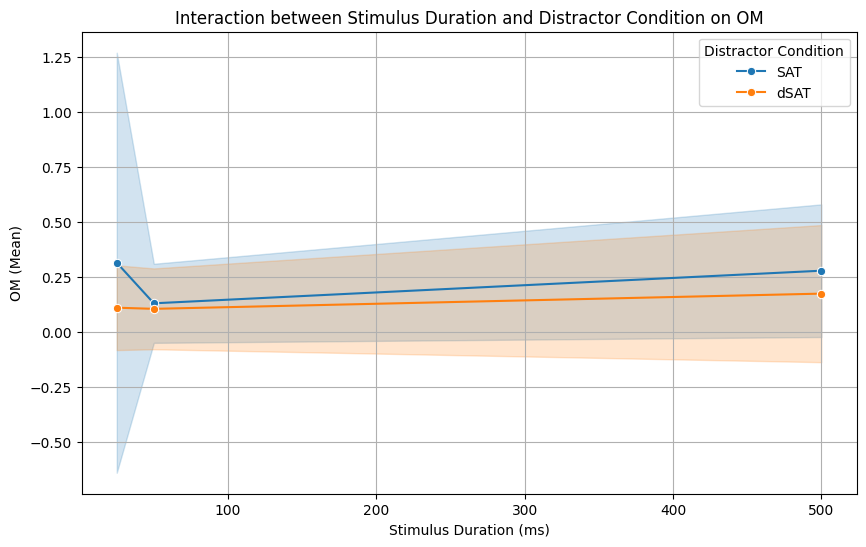

C:\Users\pfh3221\AppData\Local\Temp\ipykernel_36224\3231196641.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_agg, x='Stimulus_Duration', y='OM', hue='Distractor_Condition', ci='sd', palette="Set2")
C:\Users\pfh3221\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\pfh3221\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\pfh3221\AppData\Roaming\Python\Python38\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  func(*plot_args, **plot_kwargs)


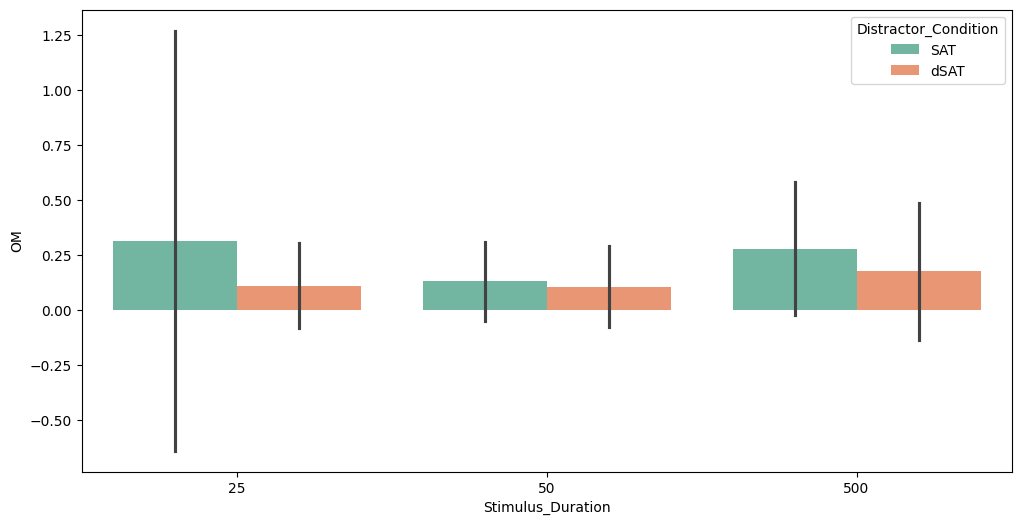

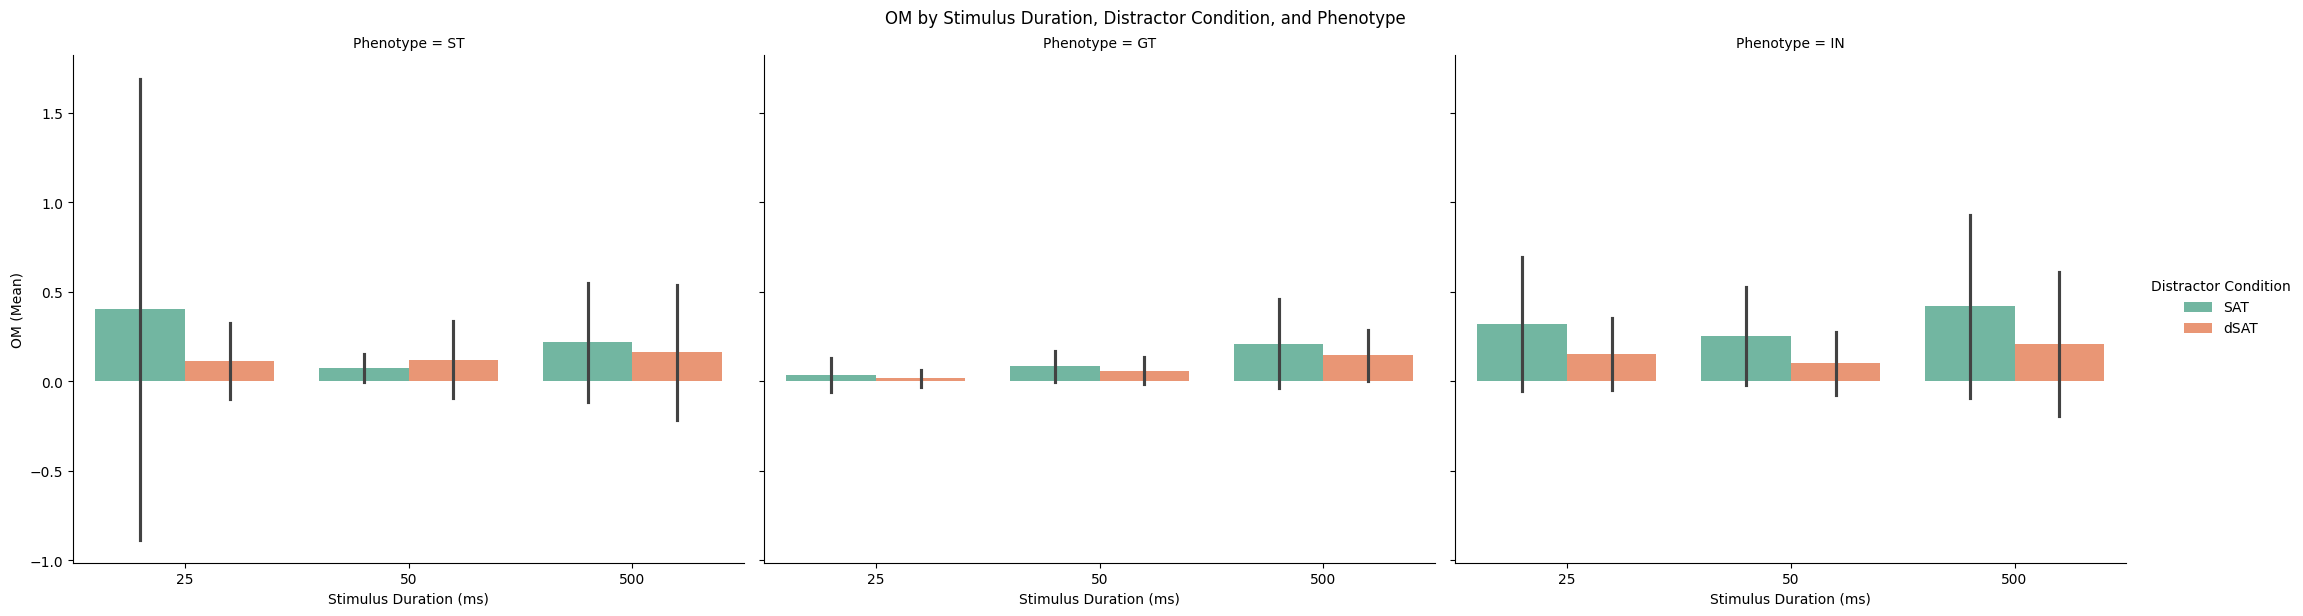

In [6]:
# Let's create a histogram-style bar plot with the different phenotypes included.
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for visualizing the interaction
plt.figure(figsize=(10, 6))

# Create a lineplot showing the interaction between Stimulus Duration and Distractor Condition
sns.lineplot(data=df_agg, x='Stimulus_Duration', y='OM', hue='Distractor_Condition', marker='o', ci='sd')

# Add labels and title
plt.title('Interaction between Stimulus Duration and Distractor Condition on OM')
plt.xlabel('Stimulus Duration (ms)')
plt.ylabel('OM (Mean)')
plt.legend(title='Distractor Condition')
plt.grid(True)

# Show the plot
plt.show()

plt.figure(figsize=(12, 6))

# Use a barplot to represent the mean OM values, grouped by Phenotype, Stimulus Duration, and Distractor Condition
sns.barplot(data=df_agg, x='Stimulus_Duration', y='OM', hue='Distractor_Condition', ci='sd', palette="Set2")

# Add the phenotype as a facet grid for more visual clarity
g = sns.FacetGrid(df_tidy_clean, col="Phenotype", height=6, aspect=1.2)
g.map_dataframe(sns.barplot, x="Stimulus_Duration", y="OM", hue="Distractor_Condition", ci='sd', palette="Set2")

# Adjust the layout for clarity
g.add_legend(title="Distractor Condition")
g.set_axis_labels('Stimulus Duration (ms)', 'OM (Mean)')
g.fig.suptitle('OM by Stimulus Duration, Distractor Condition, and Phenotype', y=1.02)

# Show the plot
plt.show()


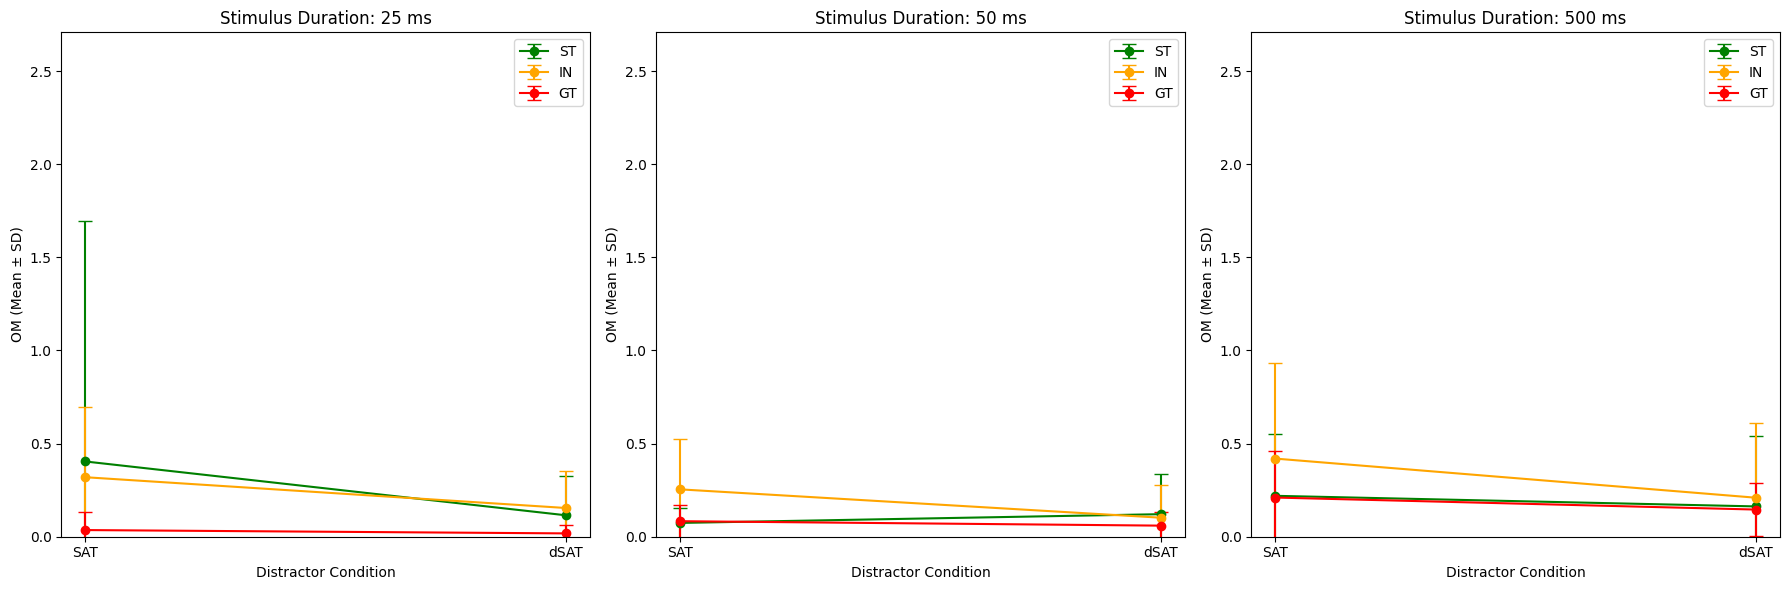

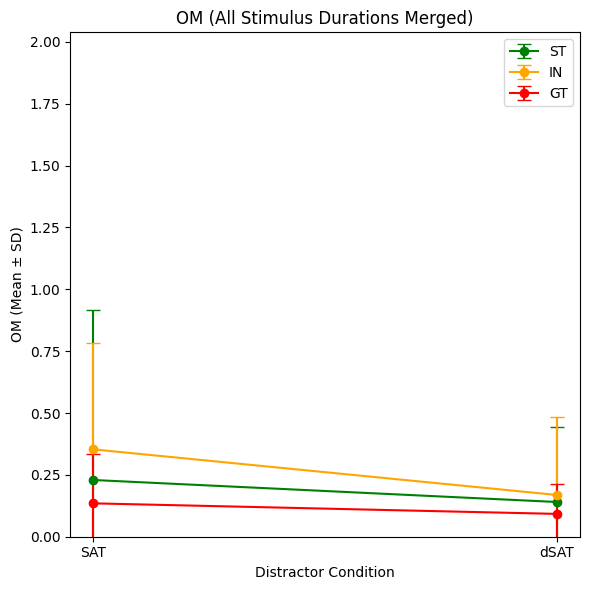

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided Excel file
file_path = 'DATA dSAT2.xlsx'

# Load the data from the 'Tidy' sheet
tidy_data = pd.read_excel(file_path, sheet_name='Tidy')

# Filter out the relevant columns for 'OM'
filtered_data = tidy_data[['Stimulus_Duration', 'Distractor_Condition', 'Phenotype', 'OM']]

# Calculate the mean and standard deviation of 'OM' for each combination of Stimulus_Duration, Distractor_Condition, and Phenotype
summary_om = filtered_data.groupby(['Stimulus_Duration', 'Distractor_Condition', 'Phenotype']).agg(
    mean_om=('OM', 'mean'),
    std_om=('OM', 'std')
).reset_index()

# Define the unique stimulus durations
stimulus_durations = summary_om['Stimulus_Duration'].unique()

# Define the phenotype colors
phenotypes = {'ST': 'green', 'IN': 'orange', 'GT': 'red'}

# Set up the plot configuration for side-by-side graphs for 'OM'
plt.figure(figsize=(18, 6))

# Create the plots for each stimulus duration with mean and standard deviation for 'OM', side by side
for i, duration in enumerate(stimulus_durations, start=1):
    plt.subplot(1, 3, i)
    
    for phenotype, color in phenotypes.items():
        subset = summary_om[(summary_om['Stimulus_Duration'] == duration) & (summary_om['Phenotype'] == phenotype)]
        plt.errorbar(subset['Distractor_Condition'], subset['mean_om'], yerr=subset['std_om'], 
                     label=phenotype, color=color, marker='o', capsize=5)
    
    plt.title(f'Stimulus Duration: {duration} ms')
    plt.xlabel('Distractor Condition')
    plt.ylabel('OM (Mean ± SD)')
    plt.ylim(0, summary_om['mean_om'].max() + summary_om['std_om'].max() + 1)
    plt.legend()

plt.tight_layout()
plt.show()

# Now for the merged OM figure
summary_om_merged = filtered_data.groupby(['Distractor_Condition', 'Phenotype']).agg(
    mean_om=('OM', 'mean'),
    std_om=('OM', 'std')
).reset_index()

# Set up the plot configuration for the merged stimulus durations
plt.figure(figsize=(6, 6))

# Create the plot for the merged stimulus durations with mean and standard deviation for 'OM'
for phenotype, color in phenotypes.items():
    subset = summary_om_merged[summary_om_merged['Phenotype'] == phenotype]
    plt.errorbar(subset['Distractor_Condition'], subset['mean_om'], yerr=subset['std_om'], 
                 label=phenotype, color=color, marker='o', capsize=5)

plt.title('OM (All Stimulus Durations Merged)')
plt.xlabel('Distractor Condition')
plt.ylabel('OM (Mean ± SD)')
plt.ylim(0, summary_om_merged['mean_om'].max() + summary_om_merged['std_om'].max() + 1)
plt.legend()

plt.tight_layout()
plt.show()
